In this iPython notebook, we will featurize MOR ligand binding simulation by pairwise distances between the ligand and different receptor residues. We will then perform tICA and prospectively build an MSM. 

In [1]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# changing matplotlib the default style
matplotlib.style.use('ggplot')
#matplotlib.rcParams["figure.facecolor"] = "white"
#matplotlib.rcPar|ams["savefig.transparent"] = "True"


In [2]:
import pandas as pd


from PDB_Order_Fixer import PDB_Order_Fixer
import mdtraj as md
import os
import numpy as np
import h5py

import datetime
import glob
import copy
from functools import partial 
import operator
import time

import random 
import subprocess
from subprocess import Popen
import sys
from custom_clusterer import *
from custom_tica import *
from custom_featurizer import *
from pdb_editing import *
from analysis import *
from io_functions import *
#from topology_fixing import *
from subsampling import *
from conversions import *
from custom_msm import *
from grids import *
from docking_analysis import *

from scipy import stats
import os
from efficacy_scripts import *




/home/enf/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [3]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
from sklearn.preprocessing import scale

In [5]:
from detect_intermediates import *
from interpret_tICs import *

In [6]:
from msmbuilder.utils import verbosedump, verboseload


In [7]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import scale
from random import shuffle
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

In [30]:
from get_variable_names import *

In [34]:
base = "/home/enf/md_simulations/B1AR"
feature_name = "contact_6pt6_angstroms-CA-py3-far"
ori_feature_name = copy.deepcopy(feature_name)

In [46]:
n_components = 2
n_clusters = 25
n_macrostates = 0
n_samples = 1

is_sparse=True
wolf_string='autoShrinkage'
rho = 0.01
rho_string = "0pt01"
lag_time=50
ori_feature_name = copy.deepcopy(feature_name)

In [47]:

tica_dir = "/home/enf/md_simulations/B1AR/sparse-tICA_t50_n_components2contact_6pt6_angstroms-CA-py3-far_regularization_wolf_autoShrinkage0pt01-backup"
sampling_method = "random"
msm_lag_time = 25
ori_tica_dir = copy.deepcopy(tica_dir)
#tica_dir = "%s-normalized" % ori_tica_dir
features_dir = get_features_dir(base, feature_name)

landmarks_dir = get_landmarks_dir(tica_dir)
analysis_dir = get_analysis_dir(tica_dir, n_clusters, sampling_method)
gmm_dir = get_gmm_dir(tica_dir)
rf_dir = get_rf_dir(tica_dir)


ref_tica_dir, ref_tica_coords = get_ref_tica_dirs(tica_dir)

graph_file = get_graph_file(tica_dir, msm_lag_time, n_clusters)

pnas_titles =  ["tm6_tm3_dist", "rmsd_npxxy_inactive", "rmsd_npxxy_active", "rmsd_connector_inactive", "rmsd_connector_active"]
pnas_features_dir = analysis_dir


(clusterer_dir, msm_model_dir, macrostate_dir, features_known, model_dir, projected_features_dir,
         projection_operator_dir, ktica_fit_model_filename, ktica_projected_data_filename, nystroem_data_filename,
         mutual_information_csv, pearson_csv) = get_tica_files(base, tica_dir, n_clusters, msm_lag_time, n_macrostates)

(standardized_features_dir, feature_residues_csv, feature_residues_pkl,
          contact_csv, ref_features_dir) = get_feature_files(features_dir)

(kmeans_csv, tica_coords_csv, features_csv, active_rmsd_dir, inactive_rmsd_dir, active_pnas_dir, inactive_pnas_joined, active_pnas_joined,
        clusters_map_file, ktica_clusters_map_file, analysis_file, combined_file, docking_summary, docking_joined, docking_z_scores_csv,
        aggregate_docking, aggregate_docking_joined, docking_pnas_joined, aggregate_docking_pnas, aggregate_docking_pnas_joined, docking_multiple_ligands,
        docking_distances_file, docking_pdf, mmgbsa_docking_distances, pnas_coords, mmgbsa_dir, mmgbsa_csv, mmgbsa_pdf, aggregate_mmgbsa,
        aggregate_mmgbsa_joined, aggregate_mmgbsa_pnas_joined, mmgbsa_z_scores_csv, active_clusters_csv, intermediate_clusters_csv,
        inactive_clusters_csv, pnas_clusters_averages, tica_clusters_averages, tica_classes_csv, tica_samples_csv, subgraph_save_base,
        degree_save_base, degree_map_csv, degree_z_map_csv, aggregate_docking_pnas_degree_z_joined, tic_residue_csv, feature_coefs_csv,
        duplicated_feature_coefs_csv) = get_analysis_files(analysis_dir, n_clusters, tica_dir, tica_dir, sampling_method, n_samples, precision,
                                                           msm_lag_time)

(inactive_pnas_distances_dir, active_pnas_distances_dir, active_pnas_all_distances_dir,
          inactive_pnas_distances_new_csv, active_pnas_distances_new_csv, active_pnas_joined, active_pnas_means, pnas_coords_dir,
          pnas_coords_csv, pnas_all_coords_csv, pnas_coords_hexbin_dir, pnas_coords_co_crystallized_docking_dir,
          pnas_coords_active_colors_dir, user_defined_features_file, reaction_coordinates_trajs_file) = get_pnas_files(whole_trajectory_pnas, pnas_features_dir)

features_dir = get_features_dir(base, feature_name)



graph_file = get_graph_file(tica_dir, msm_lag_time, n_clusters)
(scripts_dir, pymol_fixpdb_dir) = get_script_dir(scripts_dir)
(save_dir, reimaged_dir, mae_dir, combined_reimaged_dir, grid_dir, docking_dir) = get_docking_dirs(tica_dir, n_clusters, n_components, n_samples, sampling_method, precision)



/home/enf/md_simulations/B1AR/featurescontact_6pt6_angstroms-CA-py3-far-CA-py3-far-CA-py3-far-CA-py3-far
/home/enf/md_simulations/B1AR/featurescontact_6pt6_angstroms-CA-py3-far-CA-py3-far-CA-py3-far-CA-py3-far


In [66]:
import os
from ipyparallel import Client
rc = Client()
print(len(rc.ids))
dview = rc[:]
dview.map(os.chdir, ['/home/enf/b2ar_analysis/conformation']*len(rc.ids))

234


<AsyncMapResult: chdir>

In [49]:
bret = pd.read_excel("/home/enf/b2ar_analysis/bret_bias_study2.xlsx", header=0).set_index("EvanName")
bret = bret.iloc[[i for i in range(0,bret.shape[0]) if np.nan_to_num(bret["CID"].values[i]) != 0]]
bret.index = ["CID_%d" %cid for cid in bret["CID"].values]


In [67]:
from importlib import reload
import grids
reload(grids)
from grids import *

grid_center="19.3,4.48,-9.24"


base_docking_dir = "/home/enf/md_simulations/B1AR/sparse-tICA_t50_n_components2contact_6pt6_angstroms-CA-py3-far_regularization_wolf_autoShrinkage0pt01-backup/clusterer_25clusters_1samples_samples_kdtree"
if not os.path.exists(base_docking_dir):
    os.makedirs(base_docking_dir)

samples_dir = "%s/samples" %base_docking_dir
ligands_dir = "/home/enf/b2ar_analysis/all_ligands/1_stereoisomer"
if not os.path.exists(ligands_dir):
    os.makedirs(ligands_dir)

grid_dir = "%s/grids" %base_docking_dir
if not os.path.exists(grid_dir):
    os.makedirs(grid_dir)
    
precision = "SP"
docking_dir = "%s/docking_%s" %(base_docking_dir, precision)
if not os.path.exists(docking_dir):
    os.makedirs(docking_dir)

reimaged_dir = samples_dir
mae_dir = reimaged_dir
#remove_ter(reimaged_dir)
#reorder(reimaged_dir)

active_ref_dir = "/home/enf/md_simulations/B1AR/sparse-tICA_t50_n_components2contact_6pt6_angstroms-CA-py3-far_regularization_wolf_autoShrinkage0pt01-backup/clusterer_25clusters_1samples_samples_kdtree/5f8u_renumbered_P_for_conformation.pdb"   

#pprep(mae_dir, ref = active_ref_dir, chosen_receptors = None, worker_pool=None, parallel=True)

#generate_grids(mae_dir, grid_center, grid_dir, remove_lig = True, chosen_receptors = None, worker_pool=None, outer_box=25., parallel=False)

#ligand_df = prepare_ligands(ligands_dir, exts = [".mol", ".sdf"],
#                n_ring_conf=1, n_stereoisomers=1,
#                force_field=16, worker_pool=None,
#                parallel=True, redo=False,
#                smiles_df=None)#, cid_df=ligand_df,
#               #binding_db=None)

#prepare_ligands(ligands_dir, exts = [".mae", ".mol"],
#                n_ring_conf=1, n_stereoisomers=1,
#                force_field=16, worker_pool=dview,
#                parallel=False, redo=False,
#                smiles_df=None, cid_df=None,
#                binding_db=None)#binding_db[['PubChem CID', 'PubChem SID',
#                #'ChEMBL ID of Ligand', 'Ligand SMILES']])

#ligands_dir = htbc_dir

#chosen_ligands = list(set(get_ligands(ligands_dir, ".sdf") + get_ligands(ligands_dir, ".mol")))
chosen_ligands = [n for n in get_ligands(ligands_dir, ".sdf") if n in bret.index.values.tolist()]

dock_ligands_and_receptors(grid_dir, docking_dir, ligands_dir,
                           precision = precision, ext = "-out.maegz",
                           chosen_ligands=chosen_ligands, chosen_receptors = None, parallel = False,
                           grid_ext = ".zip", worker_pool=dview, retry_after_failed=True,timeout=60*60*24)

#dock_ligands_and_receptors(grid_dir, docking_dir,  biased_agonist_dir, precision = precision, ext = "-out.maegz", chosen_ligands = biased_ligands, chosen_receptors = chosen_receptors, parallel = None, grid_ext = ".grd", worker_pool=dview)
#dock_ligands_and_receptors(grid_dir, docking_dir, agonist_dir, precision = precision, ext = "-out.maegz", chosen_ligands = agonist_ligands, chosen_receptors = chosen_receptors, parallel = None, grid_ext = ".grd", worker_pool=dview)


Creating new directories for each ligand.
Done creating directories. Determining which docking jobs to conduct.
About to do 787 Docking computations.
Completed docking.


In [76]:
import analysis
from importlib import reload
reload(analysis)
from analysis import *


docking_df, poses_df = analyze_docking_results_multiple(docking_dir, precision, "%s/summary.pkl" %docking_dir, 
ligands=None, poses_summary=None, redo=True, reread=False,
write_to_disk=True, worker_pool=dview, parallel=True)

#docking_df, poses_df = analyze_docking_results_in_dir(docking_dir, ligands_dir, write_to_disk=True, redo=True)
docking_df[docking_df.columns] = np.nan_to_num(docking_df[docking_df.columns].values)
zeros_per_row = (docking_df == 0).sum(axis=1)
docking_df = docking_df.loc[zeros_per_row < 5]
#where_zeros = np.where(docking_df.values == 0)
#for row_index in where

#keep_cols = []
#for drug in docking_df.index:
#    if np.where(docking_df.loc[column].values == 0).shape[0] < 3:
#        keep_cols.append(col)
#docking_df = docking_df[keep_cols]



Analyzing docking results
/home/enf/md_simulations/B1AR/sparse-tICA_t50_n_components2contact_6pt6_angstroms-CA-py3-far_regularization_wolf_autoShrinkage0pt01-backup/clusterer_25clusters_1samples_samples_kdtree/docking_SP
Obtaining docking scores now...
Obtained ligand arguments.
Examined all ligands.
Parsed all log files.


In [78]:
full_docking_df = copy.deepcopy(docking_df)
#full_docking_df = pd.concat([ref_df, docking_df[[c for c in docking_df.columns.values.tolist() if "cluster" in c]]], axis=1)
full_docking_df[full_docking_df.columns] = np.nan_to_num(full_docking_df[full_docking_df.columns].values)
new_names =  [n.replace("cluster", "State ").replace("_sample0", "") for n in full_docking_df.columns.values.tolist()]
full_docking_df.columns = new_names
full_docking_df.index = [n.lower().strip().replace(" ", "_").replace("β", "beta").replace("α", "alpha").replace("Α", "alpha") for n in full_docking_df.index.values]
full_docking_df = full_docking_df.groupby(full_docking_df.index).first()


In [79]:
full_docking_df

,2vt4,2ycw,2ycx,2ycy,2ycz,4gpo,5f8u_hm_P_for_conformation,5f8u_renumbered_P_for_conformation,State 0,State 10,...,State 23,State 24,State 2,State 3,State 4,State 5,State 6,State 7,State 8,State 9
cid_10087493,6.58,7.23,8.45,7.42,6.08,6.39,8.36,6.88,6.71,5.11,...,5.72,7.18,6.88,7.01,5.31,6.45,4.37,7.79,6.75,5.94
cid_10353067,6.45,7.43,7.93,7.12,6.15,7.52,7.64,6.83,7.47,7.24,...,6.78,7.25,6.89,6.78,5.63,6.33,4.11,7.91,6.80,8.00
cid_10443654,6.80,7.81,8.62,6.67,6.61,6.59,8.50,7.18,6.85,6.87,...,5.72,6.95,6.00,7.76,5.62,6.01,4.14,7.80,6.84,7.14
cid_123686,8.28,8.92,7.55,8.55,8.18,6.78,6.92,7.36,7.36,7.35,...,6.77,6.66,8.01,6.62,8.83,6.39,4.03,8.43,8.65,6.35
cid_1237,7.14,7.90,8.51,6.96,7.09,8.22,8.20,7.59,7.20,6.98,...,7.14,7.83,5.82,7.56,6.25,7.17,4.43,8.37,7.19,6.75
cid_155774,8.15,9.07,9.40,6.91,8.07,5.54,6.43,6.66,6.92,7.15,...,7.98,6.62,7.08,5.65,7.29,7.48,4.33,6.83,7.61,6.33
cid_161394,7.42,6.91,8.19,7.29,6.60,7.36,9.19,7.02,7.32,5.97,...,6.03,8.03,5.45,7.39,6.00,5.27,4.62,9.16,7.48,7.10
cid_170373,8.02,7.55,8.95,6.93,7.32,7.01,10.08,6.79,7.15,5.73,...,5.50,6.54,6.12,6.07,7.13,5.64,3.60,6.36,7.82,6.07
cid_18026,5.75,6.09,5.78,5.47,5.84,6.05,7.19,5.99,6.25,5.28,...,5.16,7.53,4.93,6.24,5.91,5.98,3.65,6.15,6.06,5.28
cid_2083,6.87,8.05,8.62,6.95,6.45,5.78,8.49,6.98,6.17,5.45,...,5.38,6.77,6.21,7.85,5.38,5.69,4.37,7.87,6.94,6.09


In [80]:
bouvier=False
if bouvier:
    gprot_col = "cAMP EMAX"
    arr_col = "ERK1/2 EMAX"
else:
    gprot_col = "B1AR-Gprotein, Mean"
    arr_col = "B1AR-Arrestin, Mean"

In [81]:
results_dict = {}

In [96]:
from sklearn import preprocessing

from importlib import reload
import efficacy_scripts
reload(efficacy_scripts)
from efficacy_scripts import *

full_ligand_df = copy.deepcopy(bret)
full_ligand_df.index = [n.lower() for n in full_ligand_df.index.values.tolist()]

X_df = full_docking_df
X_df = X_df.dropna().reset_index().drop_duplicates(subset='index', keep='first').set_index('index')
X_df["difference"] = X_df["5f8u_hm_P_for_conformation"].subtract(X_df["5f8u_renumbered_P_for_conformation"])
C_df = X_df[[n for n in X_df.columns.values.tolist() if "State" not in n]]
common_ligands = [n for n in X_df.index.values.tolist() if n in full_ligand_df.index.values]

y_arr = full_ligand_df[arr_col].loc[common_ligands].values.reshape((-1,1))
y_gpr = full_ligand_df[gprot_col].loc[common_ligands].values.reshape((-1,1))
y_ori = y_gpr - y_arr
#y_ori = y_arr
#y = preprocessing.binarize(bret[gprot_col].loc[common_ligands].values, .2).reshape((-1,1))
diff_cutoff = 0.2
abs_cutoff = 0.2

inactive_ligands = [n for n in full_docking_df.index.values.tolist() if "inactive" in n]

def generate_bias_features(bret, gprot_col, arr_col, common_ligands, diff_cutoff=0.3, abs_cutoff=0.2):
    total_activity = bret[arr_col].loc[common_ligands].add(bret[gprot_col].loc[common_ligands])
    #common_agonists = set(bret.loc[bret[arr_col] > abs_cutoff].index.values.tolist()).union(set(bret.loc[bret[gprot_col] > abs_cutoff].index.values.tolist()))
    common_agonists = total_activity.loc[total_activity > abs_cutoff].index.values
    y = np.zeros(len(common_ligands)).reshape((-1,1))
    y_arr = bret[arr_col].loc[common_ligands].values.reshape((-1,1))
    y_gpr = bret[gprot_col].loc[common_ligands].values.reshape((-1,1))
    for idx, lig in enumerate(common_ligands):
        if lig in common_agonists:
            if y_gpr[idx] - y_arr[idx] > diff_cutoff:
                y[idx] = 1.
            else:
                y[idx] = 0.
        else:
            y[idx] = 2.

    y_df = pd.DataFrame(y, index=common_ligands, columns=["class"])
    return y, y_df
total_activity = full_ligand_df[arr_col].loc[common_ligands].add(full_ligand_df[gprot_col].loc[common_ligands])
#model_agonists = total_activity.loc[total_activity > abs_cutoff].index.values 
model_agonists = copy.deepcopy(common_ligands)

y, y_df = generate_bias_features(full_ligand_df, gprot_col, arr_col, model_agonists,
                                 diff_cutoff=diff_cutoff, abs_cutoff=abs_cutoff)

cutoff = [0.2]
y = multi_binarizer(y_gpr, cutoff)
#y = multi_binarizer(y_arr, cutoff)

y_df = pd.DataFrame(y, index=common_ligands, columns=["class"])

#inactive_df = pd.DataFrame(np.array([0. for i in range(0, len(inactive_ligands))]).reshape((-1,1)), columns=["class"], index=inactive_ligands)
#y_df = pd.concat([y_df, inactive_df], axis=0)
#y = y_df.values
#model_agonists += inactive_ligands

C_df = X_df[[c for c in X_df.columns.values.tolist() if "State" not in c]]

X = X_df.values

feature_names = ["Crystal Docking", "(MSM + Crystal) Docking"]#, "MSM Features Reweighted"]#, "Docking ddG and Observables"]


n_trials = 1000
train_test_split_prop = 0.8
model_type = "rfr"
def normalize_per_ligand(df):
    new_df = copy.deepcopy(df)
    n_df = new_df.ix[:, [i for i in range(0, new_df.shape[1]) if "difference" not in new_df.columns.values[i].lower()]]
    n_df = pd.DataFrame(preprocessing.scale(n_df.values, axis=1), index=n_df.index, columns=n_df.columns.values.tolist())
    new_df = pd.concat([new_df, n_df], axis=1)
    return(new_df)

normalize = False
normalize_axis0 = True
if normalize_axis0:
    double_features = 2
    X_df = normalize_per_ligand(X_df)
else: 
    double_features = 1
n_estimators = 1000

features = [C_df.loc[model_agonists], X_df.loc[model_agonists]]#, all_features_df]#, all_features]
print([f.shape for f in features])
#save_name = "arr-cutoff%s_%s_trials%d_split%s" %(str(cutoff), model_type, n_trials, str(train_test_split_prop))
save_name = "antagonist_vs_agonist_vs_dud-%s_%s_trials%d_split%s_normalize%s_normalize-axis0%s_n-estimators%d_precision%s" %(str(diff_cutoff), model_type, n_trials, str(train_test_split_prop), str(normalize), str(normalize_axis0), n_estimators, precision)
#save_name = "a_vs_g_vs_inactive-%s_%s_trials%d_split%s_normalize%s_normalize-axis0%s_n-estimators%d_precision%s" %(str(diff_cutoff), model_type, n_trials, str(train_test_split_prop), str(normalize), str(normalize_axis0), n_estimators, precision)
results_dict[save_name] = generate_or_load_model(features, y, feature_names,
                                                 n_trials, train_test_split_prop, False,
                                                 model_type, "%s/%s.pkl" %(analysis_dir, save_name),
                                                redo=True, worker_pool=dview, parallel=True, n_estimators=n_estimators, 
                                                max_depth=None, criterion='gini',
                                                 normalize=normalize, normalize_axis0=False,
                                                 loocv=False)



[(45, 9), (45, 67)]
Aobut to fit model(s).
Fitting models over all data...
Fitting models over split train data...
Finished fitting models


In [93]:
bret

,Number,PaperName,Abbreviation,"B2AR-Gprotein, Mean","B2AR-Gprotein, IA(from CR curves) Mean","B2AR-Gprotein, Log(EC50), Mean","B2AR-Arrestin, Mean","B2AR-Arrestin, IA(from CR curves) Mean","B2AR-Arrestin, Log(EC50), Mean","B1AR-Gprotein, Mean","B1AR-Gprotein, IA(from CR curves) Mean","B1AR-Gprotein, Log(EC50), Mean","B1AR-Arrestin, Mean","B1AR-Arrestin, IA(from CR curves) Mean","B1AR-Arrestin Log(EC50), Mean",CID
CID_7436,1,Adrenalone,ADO,1.01,1,-6.52,0.95,0.94,-5.4,0.62,0.99,-4.8,0.66,0.87,-4.52,7436
CID_10443654,2,AH 3021,AH30,0.89,0.74,-6.93,0.31,0.3,-6.36,0.42,0.47,-5.81,0.53,0.52,-5.99,10443654
CID_161394,3,AH 3474A,AH34,-0.02,-,-,0.00,-,-,-0.01,-,-,0.02,-,-,161394
CID_2083,4,Albuterol (Salbutamol),ALB,0.81,0.64,-7.17,0.29,0.31,-6.69,0.35,0.4,-5.47,0.37,0.36,-5.86,2083
CID_2119,5,Alprenolol,ALP,0.05,-,-,0.00,-,-,0.09,-,-,0.05,-,-,2119
CID_2249,6,Atenolol,ATE,0.03,-,-,0.00,-,-,-0.01,-,-,-0.01,-,-,2249
CID_2405,7,Bisoprolol,BIS,-0.03,-,-,0.00,-,-,-0.01,-,-,-0.02,-,-,2405
CID_18026,8,Butoxamine (Butaxamine),BUTX,-0.02,-,-,0.00,-,-,0.02,-,-,0.02,-,-,18026
CID_5606,9,C78 (Tulobuterol),C78,0.47,0.36,-7.29,0.03,-,-,0.17,0.21,-5.42,0.24,0.33,-5.59,5606
CID_2585,10,Carvedilol,CARV,-0.01,-,-,0.00,-,-,0.10,-,-,0.04,-,-,2585


In [95]:
y

array([[ 0.],
       [ 0.],
       [ 0.],
       [ 2.],
       [ 2.],
       [ 0.],
       [ 2.],
       [ 0.],
       [ 2.],
       [ 0.],
       [ 2.],
       [ 0.],
       [ 2.],
       [ 0.],
       [ 0.],
       [ 2.],
       [ 2.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 2.],
       [ 0.],
       [ 2.],
       [ 0.],
       [ 0.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 0.],
       [ 2.],
       [ 0.],
       [ 2.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 2.],
       [ 0.]])

analyzing precision at full recall:
(1000, 2)
                         Median AUC  Median delta AUC  \
Crystal Docking            0.714286          0.000000   
(MSM + Crystal) Docking    0.833333          0.089286   

                                         Sign Test 99% CI  
Crystal Docking                                  (0, 0.0)  
(MSM + Crystal) Docking  (0.542419397711, 0.622486468915)  


ValueError: list.remove(x): x not in list

analyzing threshold at full recall:
(1000, 2)
                         Median AUC  Median delta AUC  \
Crystal Docking              0.3370             0.000   
(MSM + Crystal) Docking      0.5365             0.091   

                                        Sign Test 99% CI  
Crystal Docking                                 (0, 0.0)  
(MSM + Crystal) Docking  (0.79512391289, 0.856552282933)  


ValueError: list.remove(x): x not in list

analyzing Accuracy:
(1000, 2)
                         Median AUC  Median delta AUC  \
Crystal Docking            0.777778          0.000000   
(MSM + Crystal) Docking    0.777778          0.055556   

                                         Sign Test 99% CI  
Crystal Docking                                  (0, 0.0)  
(MSM + Crystal) Docking  (0.459407005212, 0.540592994788)  


ValueError: list.remove(x): x not in list

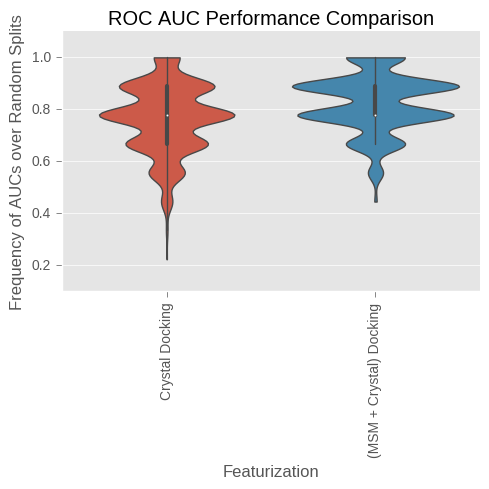

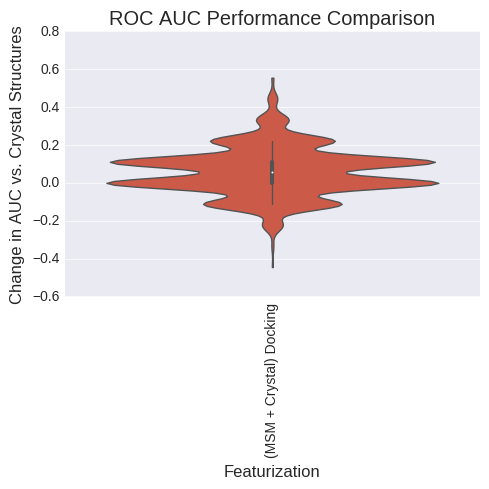

analyzing Recall:
(1000, 2)
                         Median AUC  Median delta AUC  \
Crystal Docking                 0.8               0.0   
(MSM + Crystal) Docking         1.0               0.0   

                                         Sign Test 99% CI  
Crystal Docking                                  (0, 0.0)  
(MSM + Crystal) Docking  (0.376533781499, 0.456573534205)  


ValueError: list.remove(x): x not in list

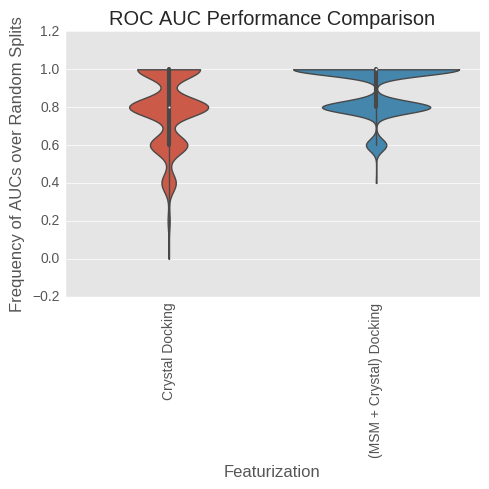

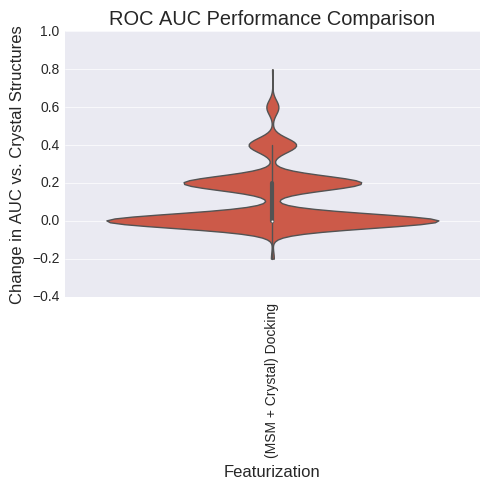

analyzing precision:
(1000, 2)
                         Median AUC  Median delta AUC  \
Crystal Docking            0.800000               0.0   
(MSM + Crystal) Docking    0.833333               0.0   

                                         Sign Test 99% CI  
Crystal Docking                                  (0, 0.0)  
(MSM + Crystal) Docking  (0.374574787496, 0.454558892867)  


ValueError: list.remove(x): x not in list

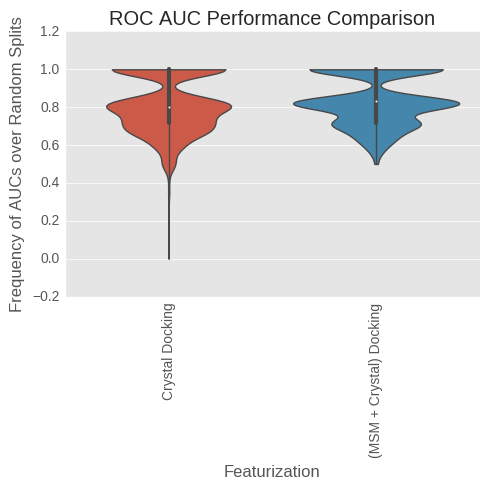

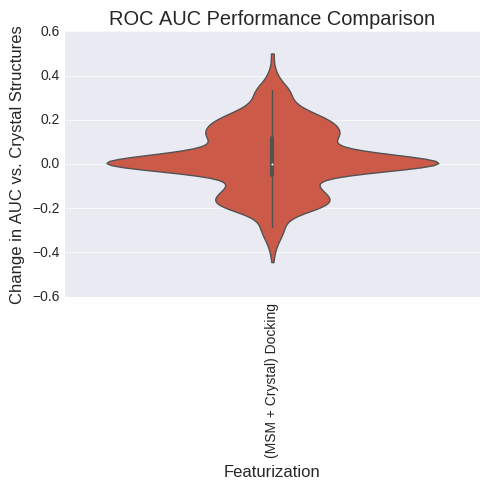

analyzing fdr:
(1000, 2)
                         Median AUC  Median delta AUC  \
Crystal Docking            0.200000               0.0   
(MSM + Crystal) Docking    0.166667               0.0   

                                         Sign Test 99% CI  
Crystal Docking                                  (0, 0.0)  
(MSM + Crystal) Docking  (0.230685386436, 0.302412461069)  


ValueError: list.remove(x): x not in list

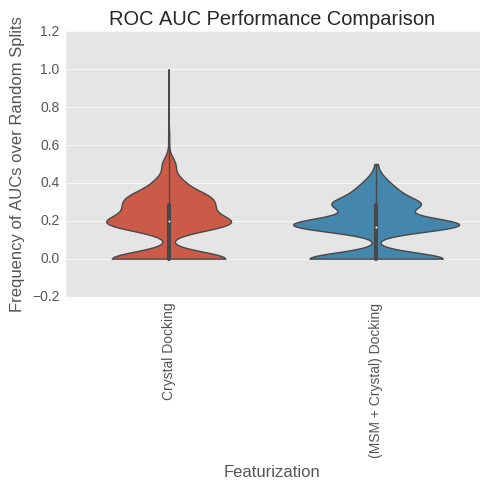

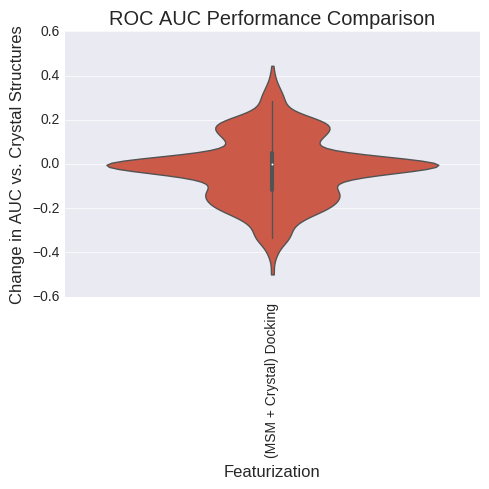

analyzing Recall:
(1000, 2)
                         Median AUC  Median delta AUC  \
Crystal Docking                 0.8               0.0   
(MSM + Crystal) Docking         1.0               0.0   

                                         Sign Test 99% CI  
Crystal Docking                                  (0, 0.0)  
(MSM + Crystal) Docking  (0.376533781499, 0.456573534205)  


ValueError: list.remove(x): x not in list

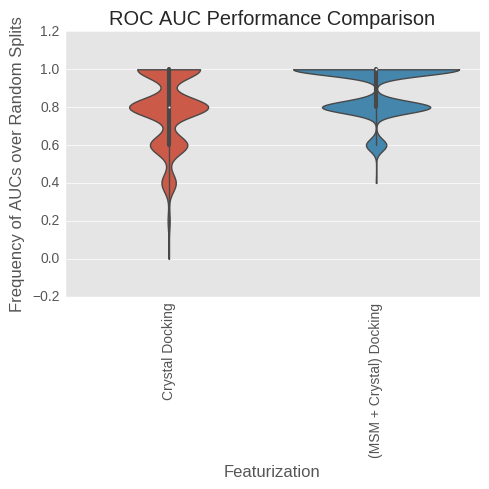

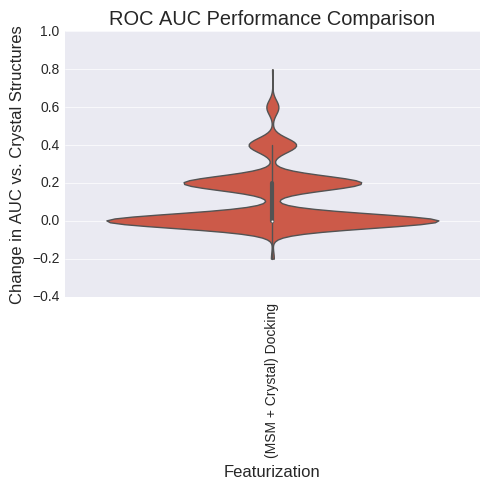

analyzing precision:
(1000, 2)
                         Median AUC  Median delta AUC  \
Crystal Docking            0.800000               0.0   
(MSM + Crystal) Docking    0.833333               0.0   

                                         Sign Test 99% CI  
Crystal Docking                                  (0, 0.0)  
(MSM + Crystal) Docking  (0.374574787496, 0.454558892867)  


ValueError: list.remove(x): x not in list

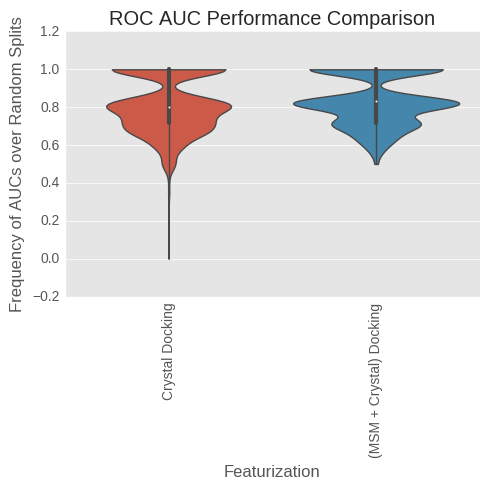

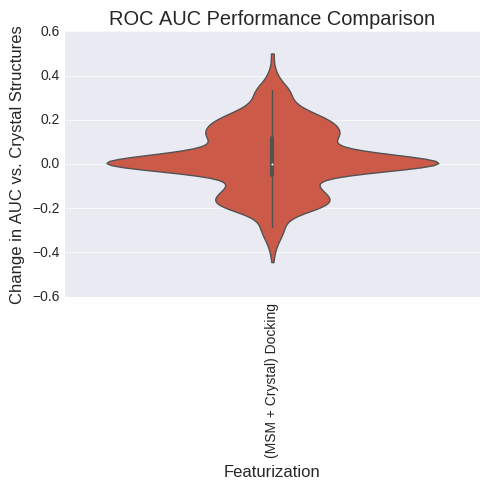

analyzing fdr:
(1000, 2)
                         Median AUC  Median delta AUC  \
Crystal Docking            0.200000               0.0   
(MSM + Crystal) Docking    0.166667               0.0   

                                         Sign Test 99% CI  
Crystal Docking                                  (0, 0.0)  
(MSM + Crystal) Docking  (0.230685386436, 0.302412461069)  


ValueError: list.remove(x): x not in list

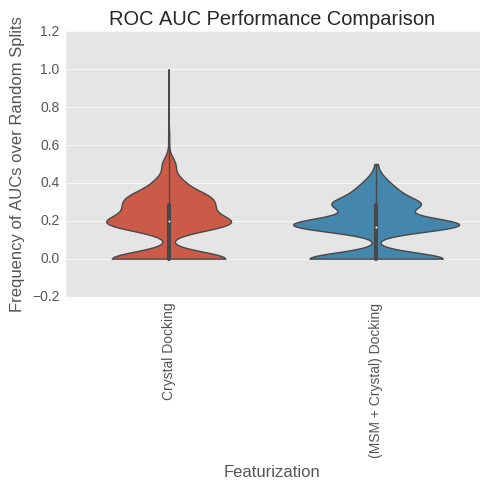

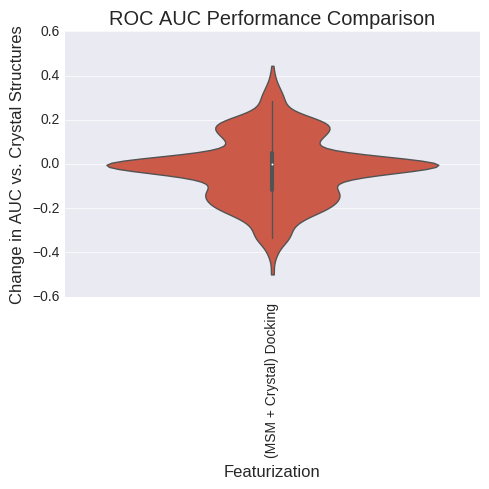

analyzing class B ROC AUC:
(1000, 2)
                         Median AUC  Median delta AUC  \
Crystal Docking                 0.8               0.0   
(MSM + Crystal) Docking         0.9               0.1   

                                         Sign Test 99% CI  
Crystal Docking                                  (0, 0.0)  
(MSM + Crystal) Docking  (0.750765057239, 0.817464796436)  


ValueError: list.remove(x): x not in list

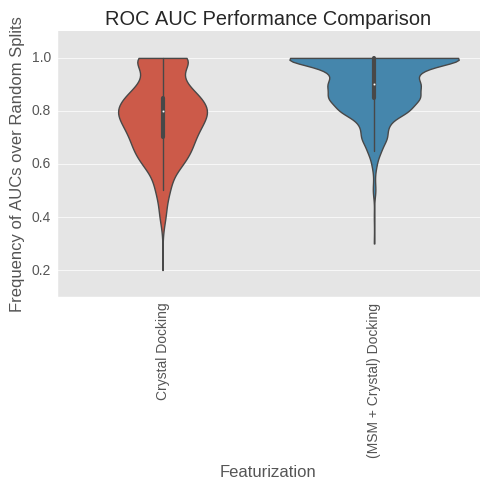

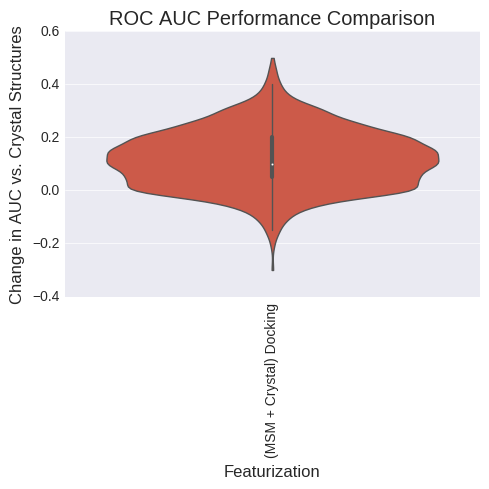

analyzing ROC AUC:
(1000, 2)
                         Median AUC  Median delta AUC  \
Crystal Docking                 0.8               0.0   
(MSM + Crystal) Docking         0.9               0.1   

                                      Sign Test 99% CI  
Crystal Docking                               (0, 0.0)  
(MSM + Crystal) Docking  (0.749715642005, 0.816527394)  


ValueError: list.remove(x): x not in list

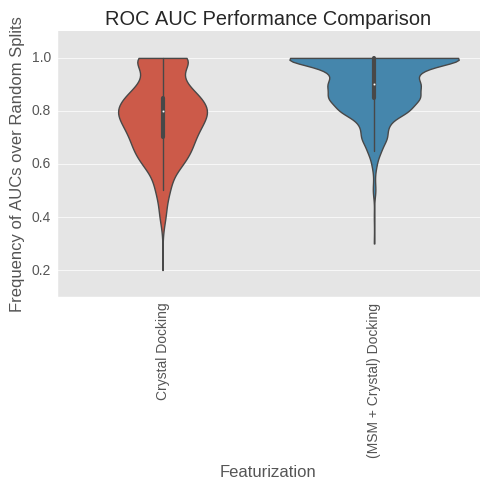

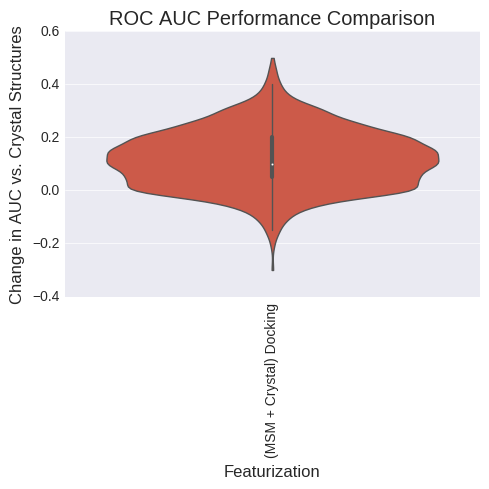

analyzing BedROC
(1000, 2)
                         Median AUC  Median delta AUC  \
Crystal Docking            0.989541          0.000000   
(MSM + Crystal) Docking    0.999878          0.009338   

                                        Sign Test 99% CI  
Crystal Docking                                 (0, 0.0)  
(MSM + Crystal) Docking  (0.761275457808, 0.82682257257)  


ValueError: list.remove(x): x not in list

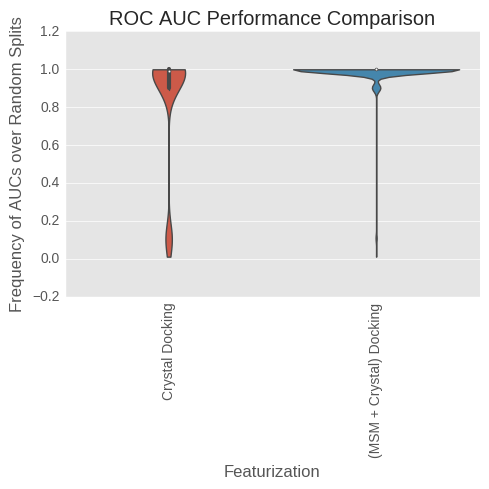

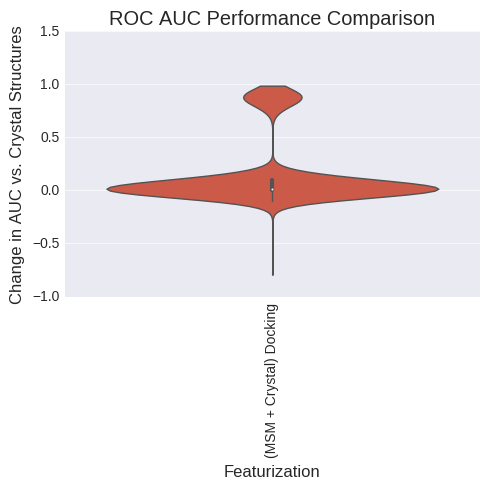

analyzing LogAUC
(1000, 2)
                         Median AUC  Median delta AUC  \
Crystal Docking            0.157614               0.0   
(MSM + Crystal) Docking    0.100343               0.0   

                                         Sign Test 99% CI  
Crystal Docking                                  (0, 0.0)  
(MSM + Crystal) Docking  (0.311284845739, 0.388705686062)  


ValueError: list.remove(x): x not in list

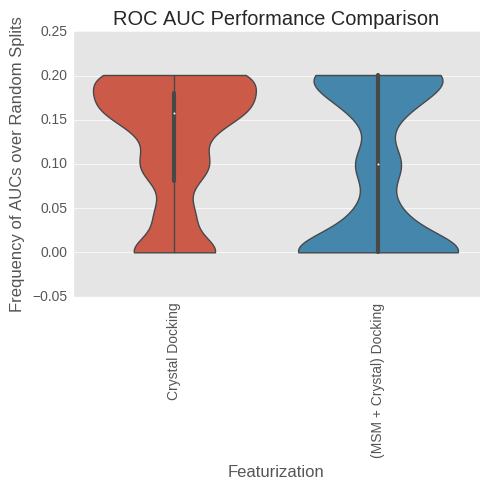

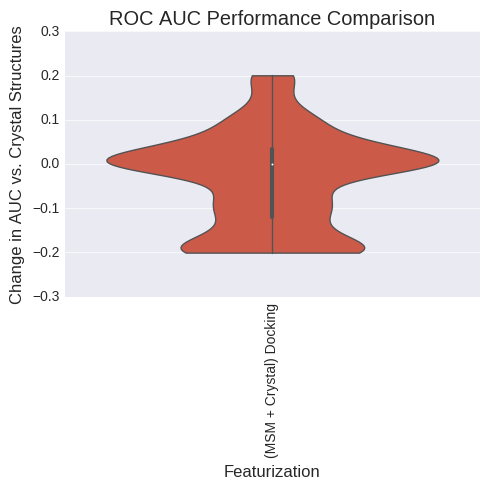

(9,)
(1, 9)


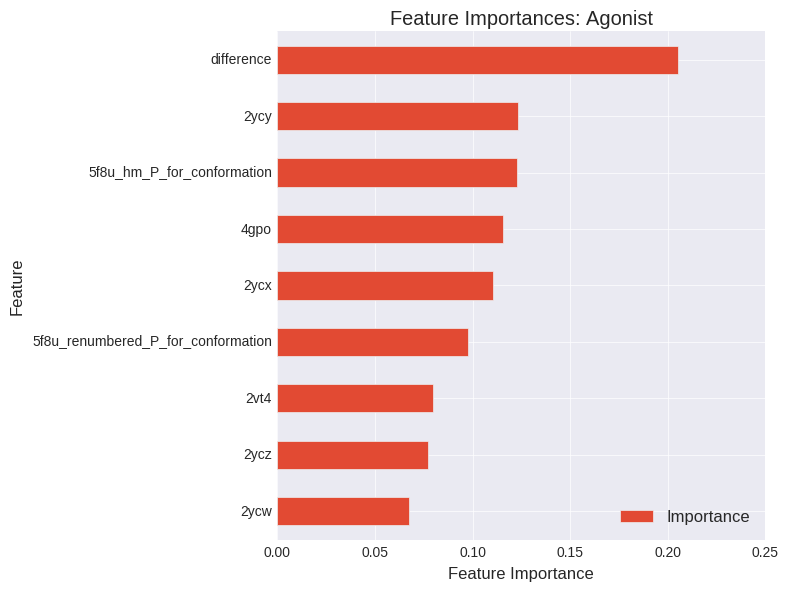

(67,)
(1, 67)


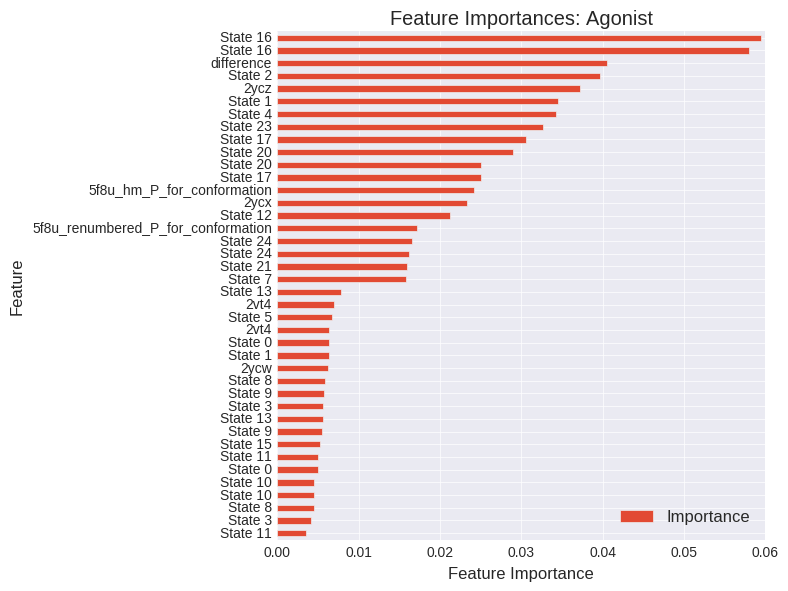

In [97]:
importance_dfs = analyze_multiclass_experiment(results_dict[save_name], 
                                                                feature_names,
                                                                [f.columns.values.tolist() for f in features], full_ligand_df.loc[model_agonists].index.values, analysis_dir,
                                                                ["Antagonist", "Agonist"], 
                                                                #["Gs Inactive", "Gs Active"], 
                                                               #["Arr Inactive", "Arr Active"],
                                               np.hstack([X_df.loc[model_agonists].values]),
                                                               #["Gs Inactive", "Gs Partial Active", "Gs Full Active"], 
                                              remake=False, fxn=np.median)

In [23]:
common_ligands

['cid_10087493',
 'cid_10353067',
 'cid_10443654',
 'cid_123686',
 'cid_1237',
 'cid_155774',
 'cid_161394',
 'cid_170373',
 'cid_18026',
 'cid_2083',
 'cid_217246',
 'cid_2249',
 'cid_23843',
 'cid_23844',
 'cid_2405',
 'cid_2585',
 'cid_2687',
 'cid_2755',
 'cid_2783',
 'cid_3343',
 'cid_33572',
 'cid_3609',
 'cid_36811',
 'cid_3779',
 'cid_3869',
 'cid_4086',
 'cid_4382',
 'cid_4546390',
 'cid_4883',
 'cid_4946',
 'cid_5241141',
 'cid_5253',
 'cid_5403',
 'cid_681',
 'cid_7436',
 'cid_838',
 'cid_913',
 'cid_951']

In [ ]:
common_ligands = [n for n in full_ligand_df.drop_duplicates().index.values if n.lower().strip() in full_docking_df.index.values]
#other_ligands = [n for n in ligand_df.index.values if n.lower().strip() not in full_docking_df.index.values]
print(len(common_ligands))